# Simple linear regression Assignment
# Data set Salary _Data


# Salary_hike -> Build a prediction model for Salary_hike

In [3]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [4]:
#reading the data set
salary = pd.read_csv("Salary_Data.csv")

In [5]:
print(salary.shape,"Shape of the data")

(30, 2) Shape of the data


In [6]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
#checking for the null values 
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


here there are no null values

# Checking for the outliers 

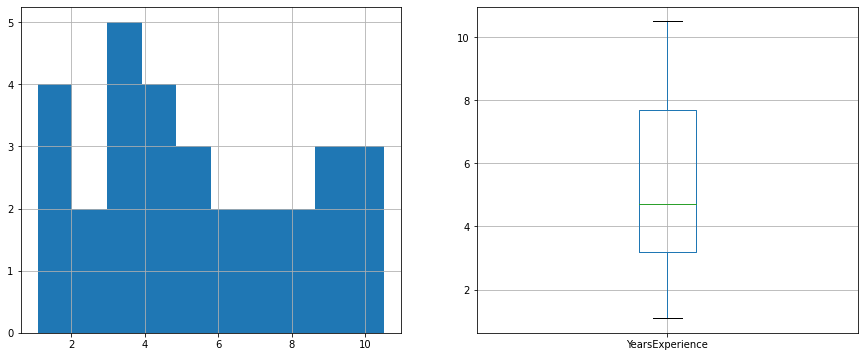

In [8]:
#checking the outliers for YearsExperience column
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
salary["YearsExperience"].hist()
plt.subplot(1,2,2)
salary.boxplot(column=["YearsExperience"])
plt.show()

here there are no outliers present

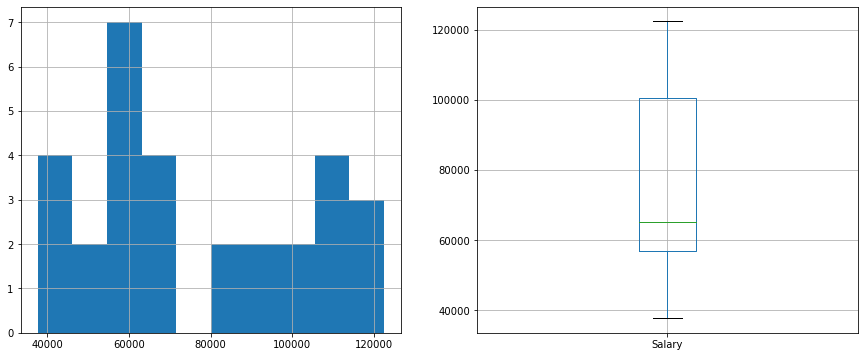

In [9]:
#checking the outlayers for the Salary column
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
salary["Salary"].hist()
plt.subplot(1,2,2)
salary.boxplot(column=["Salary"])

plt.show()

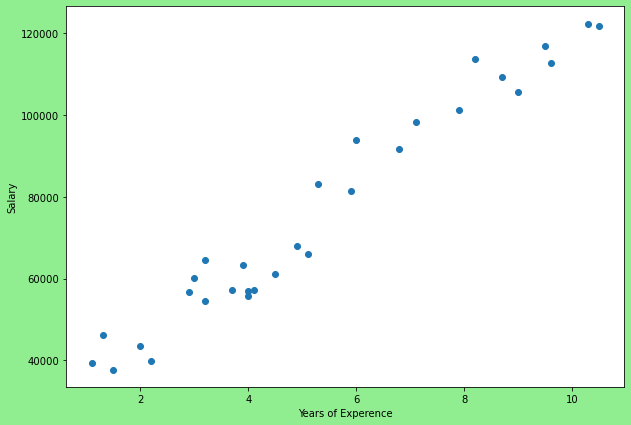

In [10]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(salary.YearsExperience,salary.Salary)
plt.xlabel("Years of Experence")
plt.ylabel("Salary")
plt.show()

In [11]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

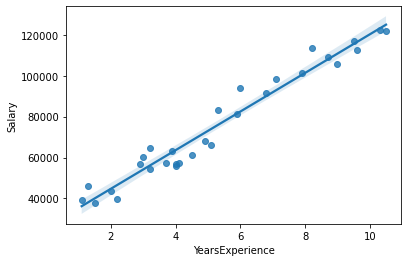

In [12]:
#predicting the model without applying the model
import seaborn as sns
test_model = smf.ols("YearsExperience~Salary",data=salary).fit()
sns.regplot(x="YearsExperience",y="Salary",data=salary)

In [13]:
#creating the model with sklearn libreary
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
model=LinearRegression()
X = salary["YearsExperience"].values.reshape(-1,1)
Y = salary["Salary"].values.reshape(-1,1)

reg_sklearn = model.fit(X,Y)

In [15]:
salary["YearsExperience"].head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [16]:
print(reg_sklearn.coef_)#alpha
print(reg_sklearn.intercept_)#beta

[[9449.96232146]]
[25792.20019867]


In [17]:
reg_sklearn.predict(X)

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

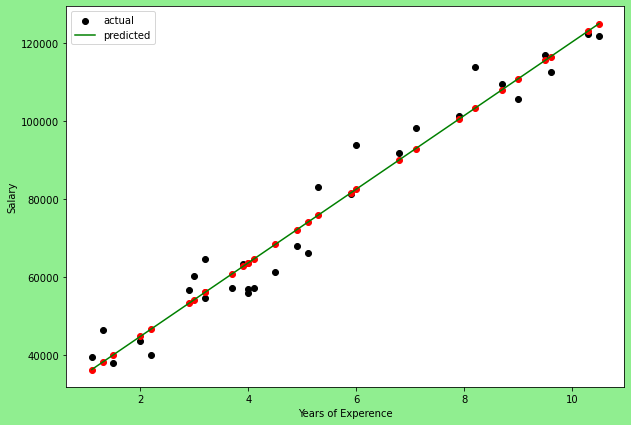

In [18]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(salary.YearsExperience,(salary.Salary),color="black",label="actual");
plt.plot(salary.YearsExperience,reg_sklearn.predict(X),label="predicted",color="green",linestyle="-");
plt.scatter(salary.YearsExperience,reg_sklearn.predict(X),color="red")
plt.xlabel("Years of Experence")
plt.ylabel("Salary")
plt.legend(loc="best")
plt.show()

In [19]:
#model valadition
pred_salary_lm = reg_sklearn.predict(X)
r2_score(salary["Salary"],pred_salary_lm)

0.9569566641435086

In [28]:
#model with statsmodels
first_model = smf.ols("Salary~YearsExperience",data=salary).fit()

In [29]:
first_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [30]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        10:52:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

as the r**2 value is more nearer to 1 therefore the model is good 

# here in this model the r**2 value is 0.957 which is nearer to 1 and the p value is also nearer to 0 Hence the model created is a better model to predict the salary

In [31]:
#applying the transformation model creating the new models

In [32]:
second_model = smf.ols('Salary~np.log(YearsExperience)',data=salary).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           3.25e-13
Time:                        10:53:28   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
third_model = smf.ols('Salary~np.exp(YearsExperience)',data=salary).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           2.72e-05
Time:                        10:54:22   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# since by applying the transformation 
in second model we got the R**2 of 85.4 % and in third model R**2=47.2%
and in first model R**2 == 95.7% 
concluding that the first model is the better model to predict the salary hike